In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pip install srtm.py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for srtm.py: filename=SRTM.py-0.3.7-py3-none-any.whl size=105846 sha256=a1da396cd2501e6a84cf70b081f935d6cf7c497935a14c9ddaa27cb2fff648eb
  Stored in directory: /root/.cache/pip/wheels/86/8d/be/cafef7d5285bb6b4a7a42ba3fc72b6c9edccb0d02679acb8ea
Successfully built srtm.py
Note: you may need to restart the kernel to use updated packages.


     Precipitation Precipitation CHIRPS
    1 mm/d daily 5566m 0%
    2 LST Daily Land Surface Temperature NOAA
    2 K daily 1000m 46%
    3 AAI Aerosol index (at wavelengths 354/388) TROPOMI
    3
    / daily 1 113.2m 15%
    4 CloudFraction Effective cloud fraction TROPOMI Fraction daily 1 113.2m 15%
    5 NO2_strat Stratospheric vertical column of NO2 TROPOMI mol/m
    2 daily 1 113.2m 15%
    6 NO2_total Total vertical column of NO2 TROPOMI mol/m
    2 daily 1 113.2m 15%
    7 NO2_trop Tropospheric vertical column of NO2 TROPOMI mol/m
    2 daily 1 113.2m 41%
    8 TropopausePressure Tropopause Pressure TROPOMI Pa daily 1 113.2m 15%
    GT_NO2 Ground-level NO2 from the station ARPA µg/m³ daily / 5%

In [8]:
train = pd.read_csv('/kaggle/input/no2-estimation/Train.csv')
test = pd.read_csv('/kaggle/input/no2-estimation/Test.csv')
ss = pd.read_csv('/kaggle/input/no2-estimation/SampleSubmission.csv')
train.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [4]:
train.nunique()

ID_Zindi              86582
Date                   1096
ID                       79
LAT                      79
LON                      79
Precipitation         14264
LST                    2512
AAI                   71468
CloudFraction         63408
NO2_strat               573
NO2_total              1439
NO2_trop               1516
TropopausePressure    70688
GT_NO2                 4245
dtype: int64

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Zindi            86584 non-null  object 
 1   Date                86584 non-null  object 
 2   ID                  86584 non-null  object 
 3   LAT                 86584 non-null  float64
 4   LON                 86584 non-null  float64
 5   Precipitation       86584 non-null  float64
 6   LST                 46798 non-null  float64
 7   AAI                 73709 non-null  float64
 8   CloudFraction       73709 non-null  float64
 9   NO2_strat           73709 non-null  float64
 10  NO2_total           73709 non-null  float64
 11  NO2_trop            51111 non-null  float64
 12  TropopausePressure  73709 non-null  float64
 13  GT_NO2              82051 non-null  float64
dtypes: float64(11), object(3)
memory usage: 9.2+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Zindi            6576 non-null   object 
 1   Date                6576 non-null   object 
 2   ID                  6576 non-null   object 
 3   LAT                 6576 non-null   float64
 4   LON                 6576 non-null   float64
 5   Precipitation       6576 non-null   float64
 6   LST                 3595 non-null   float64
 7   AAI                 5708 non-null   float64
 8   CloudFraction       5708 non-null   float64
 9   NO2_strat           5708 non-null   float64
 10  NO2_total           5708 non-null   float64
 11  NO2_trop            3998 non-null   float64
 12  TropopausePressure  5708 non-null   float64
dtypes: float64(10), object(3)
memory usage: 668.0+ KB


In [4]:
ss.head()

,ID_Zindi,GT_NO2
0,ID_003WOR,0
1,ID_009Y2B,0
2,ID_01C05M,0
3,ID_0216G3,0
4,ID_023C6G,0


# eda

4245 



/tmp/ipykernel_30/1618851968.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['GT_NO2'],color="b");
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


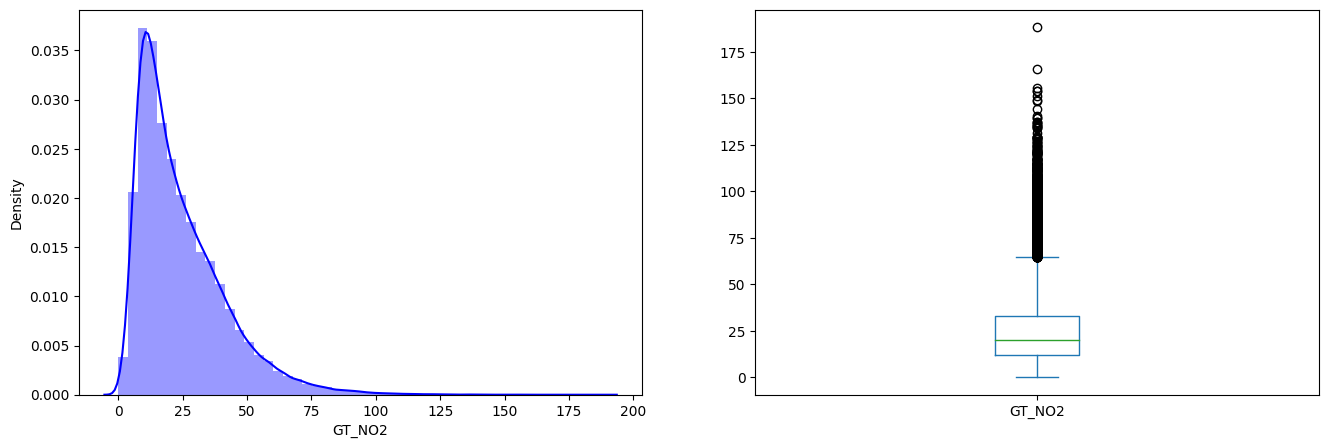

In [9]:
#continous variables

print(train.GT_NO2.nunique(),"\n")
plt.subplot(121)
sns.distplot(train['GT_NO2'],color="b");

plt.subplot(122)
train['GT_NO2'].plot.box(figsize=(16,5))

plt.show()

14264 



/tmp/ipykernel_30/1672042604.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Precipitation'],color="b");
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


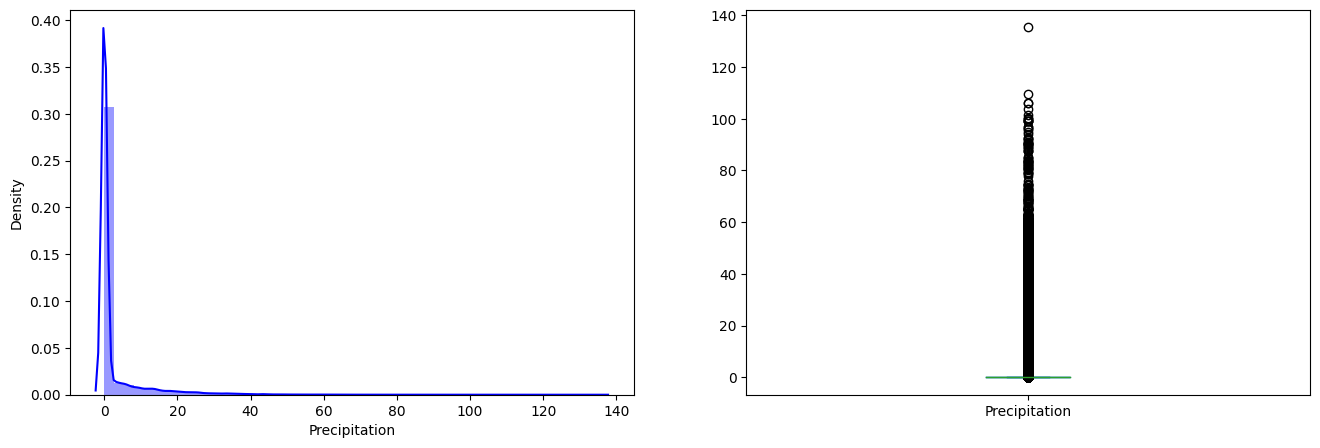

In [5]:
#continous variables

print(train.Precipitation.nunique(),"\n")
plt.subplot(121)
sns.distplot(train['Precipitation'],color="b");

plt.subplot(122)
train['Precipitation'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
#continous variables

print(train.GT_NO2.nunique(),"\n")
plt.subplot(121)
sns.distplot(train['GT_NO2'],color="b");

plt.subplot(122)
train['GT_NO2'].plot.box(figsize=(16,5))

plt.show()

# faeture eng

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Zindi            86584 non-null  object 
 1   Date                86584 non-null  object 
 2   ID                  86584 non-null  object 
 3   LAT                 86584 non-null  float64
 4   LON                 86584 non-null  float64
 5   Precipitation       86584 non-null  float64
 6   LST                 46798 non-null  float64
 7   AAI                 73709 non-null  float64
 8   CloudFraction       73709 non-null  float64
 9   NO2_strat           73709 non-null  float64
 10  NO2_total           73709 non-null  float64
 11  NO2_trop            51111 non-null  float64
 12  TropopausePressure  73709 non-null  float64
 13  GT_NO2              82051 non-null  float64
 14  elevation_meters    86584 non-null  int64  
dtypes: float64(11), int64(1), object(3)
memory usage: 9.9

In [9]:
train.nunique()

ID_Zindi              86582
Date                   1096
ID                       79
LAT                      79
LON                      79
Precipitation         14264
LST                    2512
AAI                   71468
CloudFraction         63408
NO2_strat               573
NO2_total              1439
NO2_trop               1516
TropopausePressure    70688
GT_NO2                 4245
dtype: int64

In [7]:
train.columns

Index(['ID_Zindi', 'Date', 'ID', 'LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure', 'GT_NO2'],
      dtype='object')

adding time features

In [10]:
train.describe()

,Date,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,elevation_meters
count,86584,86584.000000,86584.000000,86584.000000,46798.000000,73709.000000,73709.000000,73709.000000,73709.000000,51111.000000,73709.000000,82051.000000,86584.000000
mean,2020-07-01 12:00:00,45.421456,10.014272,2.585528,299.268841,-1.274999,0.200606,0.000045,0.000156,0.000105,16655.112392,24.535051,111.721519
min,2019-01-01 00:00:00,44.924694,8.736497,0.000000,253.200000,-5.196266,0.000000,0.000013,-0.000012,-0.000025,8614.349685,0.000000,-4.000000
25%,2019-10-01 18:00:00,45.249544,9.195325,0.000000,290.920000,-1.749425,0.023900,0.000034,0.000100,0.000047,14432.114060,11.875000,46.000000
50%,2020-07-01 12:00:00,45.478996,9.611738,0.000000,300.760000,-1.349746,0.078478,0.000047,0.000122,0.000071,16711.190570,20.000000,107.000000
75%,2021-04-01 06:00:00,45.601232,10.683357,0.000000,307.940000,-0.878857,0.278451,0.000056,0.000173,0.000129,19252.648570,33.050000,154.000000
max,2021-12-31 00:00:00,45.889734,12.590682,135.396805,327.840000,2.143020,1.000000,0.000073,0.002047,0.001097,24449.007150,188.233333,352.000000
std,NaN,0.225409,1.056637,7.617394,10.927167,0.693003,0.259607,0.000012,0.000103,0.000092,3000.748790,17.108838,79.448704


In [9]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

/tmp/ipykernel_31/1386232461.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Date'] = pd.to_datetime(train['Date'])
/tmp/ipykernel_31/1386232461.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Date'] = pd.to_datetime(test['Date'])


In [10]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['Hour'] = train['Date'].dt.hour

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
test['Hour'] = test['Date'].dt.hour

In [11]:
import pandas as pd
import srtm
from geopy.geocoders import Nominatim

# Initialize SRTM elevation data
elevation_data = srtm.get_data()



# Function to get elevation for a given latitude and longitude
def get_elevation(lat, lon):
    return elevation_data.get_elevation(lat, lon)

# Apply the function to the DataFrame to get the elevation column
train['elevation_meters'] = train.apply(lambda row: get_elevation(row['LAT'], row['LON']), axis=1)
test['elevation_meters'] = test.apply(lambda row: get_elevation(row['LAT'], row['LON']), axis=1)

# Display the DataFrame with latitude, longitude, and elevation columns
train.head()


Creating /root/.cache/srtm
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802
4 2884802


,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,Year,Month,Day,Hour,elevation_meters
0,ID_ENTGC7,2019-01-01,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0,2019,1,1,0,25
1,ID_8JCCXC,2019-01-01,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0,2019,1,1,0,10
2,ID_V3136Z,2019-01-01,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0,2019,1,1,0,-4
3,ID_KRVZDJ,2019-01-01,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0,2019,1,1,0,7
4,ID_PR351A,2019-01-01,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0,2019,1,1,0,2


In [12]:
test.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,Year,Month,Day,Hour,elevation_meters
0,ID_2MYNQS,2019-01-01,PD03,45.289376,11.642394,3.277529,NaN,-0.313361,0.771456,0.000024,0.000075,NaN,14440.02819,2019,1,1,0,11
1,ID_P4U5WU,2019-01-01,TV03,45.836941,12.510362,0.000000,NaN,-0.229512,0.398208,0.000023,0.000120,NaN,14434.04790,2019,1,1,0,7
2,ID_U4KWPK,2019-01-01,X5561,45.582894,8.842165,0.000000,282.98,-0.470822,0.153694,0.000023,0.000171,0.000148,14427.42478,2019,1,1,0,204
3,ID_QGSNTZ,2019-01-01,X5953,45.131947,10.015742,1.928031,NaN,0.132952,0.756917,0.000024,0.000266,NaN,14443.09006,2019,1,1,0,40
4,ID_GHSZ6K,2019-01-01,X6701,45.186329,9.146666,0.000000,NaN,-0.198272,0.678858,0.000023,0.000149,NaN,14440.85840,2019,1,1,0,76


In [12]:
test.columns

Index(['ID_Zindi', 'Date', 'ID', 'LAT', 'LON', 'Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure', 'elevation_meters', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [13]:
need_col = ['Precipitation', 'LST', 'AAI',
       'CloudFraction', 'NO2_strat', 'NO2_total', 'NO2_trop',
       'TropopausePressure', 'elevation_meters', 'Year', 'Month', 'Day',
       'Hour']

In [15]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
test_preds=[]
rmse=[]

# Initialize KFold for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# LightGBM parameters (you can adjust these)
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'n_estimators': 1700,
    'early_stopping_rounds': 100,
    'verbose':-1 
}



# List to store validation data with IDs, predictions, and true values
validation_results = []

# Iterate through each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(train, train['GT_NO2'])):
    print(f"Training fold {fold + 1}...")

    X_train, X_val = train.iloc[train_idx], train.iloc[val_idx]
    y_train, y_val = train['GT_NO2'].iloc[train_idx], train['GT_NO2'].iloc[val_idx]
    # Initialize and train the LightGBM regressor
    lgb_model = lgb.LGBMRegressor(**lgb_params)
    lgb_model.fit(
        X_train[need_col], y_train,
        eval_set=[(X_val[need_col], y_val)],
        eval_metric='rmse',
         # Set to 1 if you want to see training logs
    )
    
    # Predict on validation data and store the out-of-fold predictions
    val_preds = lgb_model.predict(X_val[need_col])
    #oof_preds[val_idx] = val_preds
    
    # Stack the validation results (IDs, predicted values, true values)
    validation_results.append(pd.DataFrame({
        'id': val_idx,
        'true_value': y_val,
        'predicted_value': val_preds
    }))
    
    # Calculate RMSE for the validation data in the current fold
    #fold_rmse = mean_squared_error(y_val, val_preds, squared=False)
    #print(f"Fold {fold + 1} RMSE: {fold_rmse}")
    mask = ~np.isnan(y_val) & ~np.isnan(val_preds)

    # Calculate RMSE only for non-NaN values
    fold_rmse = mean_squared_error(y_val[mask], val_preds[mask], squared=False)
    print(f"Fold {fold + 1} RMSE (ignoring NaN): {fold_rmse}")

    # Predict on test data for the current fold
    pred = lgb_model.predict(test[need_col])
    test_preds.append(pred)
    rmse.append(fold_rmse)
# Concatenate all validation results into one DataFrame
validation_df = pd.concat(validation_results, ignore_index=True)

# Calculate the mean of the test predictions from all folds
#final_test_preds = test_preds.mean(axis=1)

# Calculate the overall RMSE for the out-of-fold predictions
#overall_rmse = mean_squared_error(y, oof_preds, squared=False)
print(f"Overall OOF RMSE: {np.mean(rmse)}")

# Display validation DataFrame (ID, True Values, Predicted Values)
#print(validation_df)

# Now you can compare validation_df's 'true_value' with 'predicted_value'


Training fold 1...
Fold 1 RMSE (ignoring NaN): 7.424625256307426
Training fold 2...
Fold 2 RMSE (ignoring NaN): 7.736882916780892
Training fold 3...
Fold 3 RMSE (ignoring NaN): 7.4957756906302855
Training fold 4...
Fold 4 RMSE (ignoring NaN): 7.673104038328513
Training fold 5...
Fold 5 RMSE (ignoring NaN): 7.502288029380615
Overall OOF RMSE: 7.566535186285546


In [1]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
test_preds=[]
rmse =[]

# Initialize KFold for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

catboost_params = {
    'iterations': 1000,
    'learning_rate': 0.05,
    'depth': 6,
    'l2_leaf_reg': 3,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'early_stopping_rounds': 100,
    'random_seed': 42,
    'verbose': 20,
    'bagging_temperature': 1.0,
}


# List to store validation data with IDs, predictions, and true values
validation_results = []

# Iterate through each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(train, train['GT_NO2'])):
    print(f"Training fold {fold + 1}...")

    X_train, X_val = train.iloc[train_idx], train.iloc[val_idx]
    y_train, y_val = train['GT_NO2'].iloc[train_idx], train['GT_NO2'].iloc[val_idx]
    # Initialize and train the LightGBM regressor
    model = CatBoostRegressor(**catboost_params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val))
    
    # Predict on validation data and store the out-of-fold predictions
    val_preds = lgb_model.predict(X_val[need_col])
    #oof_preds[val_idx] = val_preds
    
    # Stack the validation results (IDs, predicted values, true values)
    validation_results.append(pd.DataFrame({
        'id': val_idx,
        'true_value': y_val,
        'predicted_value': val_preds
    }))
    
    # Calculate RMSE for the validation data in the current fold
    #fold_rmse = mean_squared_error(y_val, val_preds, squared=False)
    #print(f"Fold {fold + 1} RMSE: {fold_rmse}")
    mask = ~np.isnan(y_val) & ~np.isnan(val_preds)

    # Calculate RMSE only for non-NaN values
    fold_rmse = mean_squared_error(y_val[mask], val_preds[mask], squared=False)
    rmse.append(fold_rmse)
    print(f"Fold {fold + 1} RMSE (ignoring NaN): {fold_rmse}")

    # Predict on test data for the current fold
    pred = lgb_model.predict(test[need_col])
    test_preds.append(pred)
# Concatenate all validation results into one DataFrame
validation_df = pd.concat(validation_results, ignore_index=True)

# Calculate the mean of the test predictions from all folds
test_preds_array = np.array(test_preds)  # Convert list of predictions to a NumPy array

# Calculate the mean predictions across the folds
final_test_preds = test_preds_array.mean(axis=0)  # Change axis=1 to axis=0 for correct mean calculation

# Calculate the overall RMSE for the out-of-fold predictions
#overall_rmse = mean_squared_error(y, oof_preds, squared=False)
print(f"Overall OOF RMSE: {overall_rmse}")

# Display validation DataFrame (ID, True Values, Predicted Values)
print(validation_df)

# Now you can compare validation_df's 'true_value' with 'predicted_value'


NameError: name 'train' is not defined

In [27]:
test_preds.mean(axis=0)

AttributeError: 'list' object has no attribute 'mean'

In [26]:
test_preds

[array([30.42979664, 31.15235828, 29.35465263, ..., 34.95902866,
        32.24580289, 28.49313204]),
 array([26.43559232, 24.75919877, 26.02882062, ..., 40.12946839,
        29.62789868, 28.93467775]),
 array([29.04118713, 25.80088559, 32.63169209, ..., 34.88911005,
        31.19993317, 27.32673182]),
 array([25.45799595, 25.83051681, 25.83562881, ..., 38.27937299,
        29.98750542, 27.58696111]),
 array([28.85070653, 25.31677905, 28.64504131, ..., 34.71261525,
        27.83252351, 28.52624706])]

In [16]:
test_preds_array = np.array(test_preds)  # Convert list of predictions to a NumPy array

# Calculate the mean predictions across the folds
final_test_preds = test_preds_array.mean(axis=0)  # Change axis=1 to axis=0 for correct mean calculation

In [17]:
final_test_preds

array([28.72422179, 26.22080937, 27.31716671, ..., 36.56045393,
       29.39090694, 27.28266661])

In [18]:
test['id'] = test.index

In [19]:
test['pred'] = final_test_preds

In [25]:
test[test.ID_Zindi=='ID_003WOR']

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,Year,Month,Day,Hour,elevation_meters,id,pred
4050,ID_003WOR,2020-11-06,PD03,45.289376,11.642394,0.0,291.7,-1.90148,0.0,0.000028,0.000061,0.000032,14441.85966,2020,11,6,0,11,4050,12.40163


In [20]:
test_sub = pd.merge(ss, test[['id', 'ID_Zindi','pred']], how='left', on='ID_Zindi')
test_sub

,ID_Zindi,GT_NO2,id,pred
0,ID_003WOR,0,4050,12.401630
1,ID_009Y2B,0,1942,25.666488
2,ID_01C05M,0,4282,37.620766
3,ID_0216G3,0,1143,17.793997
4,ID_023C6G,0,4044,14.799977
...,...,...,...,...
6571,ID_ZVEQ52,0,824,12.361110
6572,ID_ZWZ1IA,0,4948,8.796953
6573,ID_ZX7B4A,0,4043,21.362280
6574,ID_ZYZLPS,0,4051,15.427636


In [21]:
test_sub['GT_NO2'] = test_sub['pred']

ss_n = test_sub[['ID_Zindi','GT_NO2']]

In [24]:
ss

,ID_Zindi,GT_NO2
0,ID_003WOR,0
1,ID_009Y2B,0
2,ID_01C05M,0
3,ID_0216G3,0
4,ID_023C6G,0
...,...,...
6571,ID_ZVEQ52,0
6572,ID_ZWZ1IA,0
6573,ID_ZX7B4A,0
6574,ID_ZYZLPS,0


In [22]:
ss_n

,ID_Zindi,GT_NO2
0,ID_003WOR,12.401630
1,ID_009Y2B,25.666488
2,ID_01C05M,37.620766
3,ID_0216G3,17.793997
4,ID_023C6G,14.799977
...,...,...
6571,ID_ZVEQ52,12.361110
6572,ID_ZWZ1IA,8.796953
6573,ID_ZX7B4A,21.362280
6574,ID_ZYZLPS,15.427636


In [23]:
ss_n.to_csv('first_lgbm_1700.csv',index=False)

In [30]:
ss

,ID_Zindi,GT_NO2
0,ID_003WOR,0
1,ID_009Y2B,0
2,ID_01C05M,0
3,ID_0216G3,0
4,ID_023C6G,0
...,...,...
6571,ID_ZVEQ52,0
6572,ID_ZWZ1IA,0
6573,ID_ZX7B4A,0
6574,ID_ZYZLPS,0


In [21]:
mask = ~np.isnan(y_val) & ~np.isnan(val_preds)

# Calculate RMSE only for non-NaN values
fold_rmse = mean_squared_error(y_val[mask], val_preds[mask], squared=False)
print(f"Fold {fold + 1} RMSE (ignoring NaN): {fold_rmse}")

Fold 1 RMSE (ignoring NaN): 7.692564250325744


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86584 entries, 0 to 86583
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_Zindi            86584 non-null  object        
 1   Date                86584 non-null  datetime64[ns]
 2   ID                  86584 non-null  object        
 3   LAT                 86584 non-null  float64       
 4   LON                 86584 non-null  float64       
 5   Precipitation       86584 non-null  float64       
 6   LST                 46798 non-null  float64       
 7   AAI                 73709 non-null  float64       
 8   CloudFraction       73709 non-null  float64       
 9   NO2_strat           73709 non-null  float64       
 10  NO2_total           73709 non-null  float64       
 11  NO2_trop            51111 non-null  float64       
 12  TropopausePressure  73709 non-null  float64       
 13  GT_NO2              82051 non-null  float64   

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_Zindi            6576 non-null   object        
 1   Date                6576 non-null   datetime64[ns]
 2   ID                  6576 non-null   object        
 3   LAT                 6576 non-null   float64       
 4   LON                 6576 non-null   float64       
 5   Precipitation       6576 non-null   float64       
 6   LST                 3595 non-null   float64       
 7   AAI                 5708 non-null   float64       
 8   CloudFraction       5708 non-null   float64       
 9   NO2_strat           5708 non-null   float64       
 10  NO2_total           5708 non-null   float64       
 11  NO2_trop            3998 non-null   float64       
 12  TropopausePressure  5708 non-null   float64       
 13  elevation_meters    6576 non-null   int64       